# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 122 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 60.3 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 58.6 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.8 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 63.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 62.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 59.7 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 63.1 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 64.6 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 68.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 60.6 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 56.1 MB/s eta 0:00:01
     |██████████████████

## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define transforms: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST-specific mean and std deviation
])

# Create the complete training set
dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)

# Split the training set into training and validation sets
train_size = int(0.7 * len(dataset))  # 80% for training
val_size = int(0.2 * len(dataset))  # 20% for validation
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset,test_dataset = random_split(dataset, [train_size, val_size,test_size])

# Define DataLoaders for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

1. the image in the MINST are origanlly 28*28 pixel greyscale and we use transforms.ToTensor() to convert the images into a PyTorch tensor


2.The MNIST dataset has a known mean and standard deviation of approximately 0.1307 and 0.3081, respectively.


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [9]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


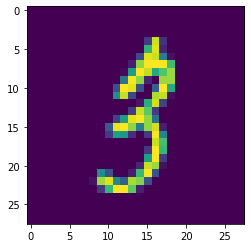

9


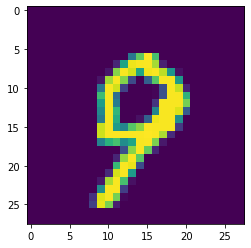

9


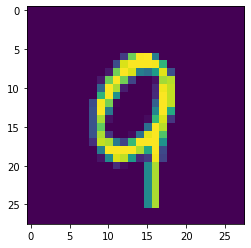

9


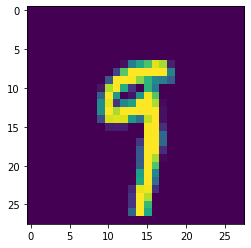

2


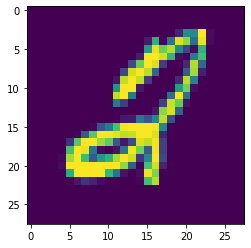

In [10]:
# Explore data
show5(train_loader)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [11]:
## YOUR CODE HERE ##

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

model = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [12]:
## YOUR CODE HERE ##
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


## I choose Adam Oprimizer because it combine the advantage of the other two opitmizer 1- Momentum and RMSProp

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_epochs = 10
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train_predictions = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # Zero gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Compute loss
        loss = criterion(outputs, labels)
        # Backpropagation and optimizer step
        loss.backward()
        optimizer.step()
        # Predictions and accuracy
        _, preds = torch.max(outputs.data, 1)
        total_train_predictions += labels.size(0)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    
    train_acc = (train_correct / total_train_predictions) * 100
    train_loss_avg = train_loss / len(train_loader)
    train_loss_history.append(train_loss_avg)
    train_acc_history.append(train_acc)
    
    print(f'Epoch {epoch + 1}: Training Accuracy: {train_acc:.2f}% | Training Loss: {train_loss_avg:.5f}')
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total_val_predictions = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            total_val_predictions += labels.size(0)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()

    val_acc = (val_correct / total_val_predictions) * 100
    val_loss_avg = val_loss / len(val_loader)
    val_loss_history.append(val_loss_avg)
    val_acc_history.append(val_acc)
    
    print(f'Epoch {epoch + 1}: Validation Accuracy: {val_acc:.2f}% | Validation Loss: {val_loss_avg:.5f}')


Epoch 1: Training Accuracy: 90.59% | Training Loss: 0.32100
Epoch 1: Validation Accuracy: 93.88% | Validation Loss: 0.18817
Epoch 2: Training Accuracy: 95.78% | Training Loss: 0.13739
Epoch 2: Validation Accuracy: 96.28% | Validation Loss: 0.12349
Epoch 3: Training Accuracy: 97.11% | Training Loss: 0.09391
Epoch 3: Validation Accuracy: 96.83% | Validation Loss: 0.10276
Epoch 4: Training Accuracy: 97.74% | Training Loss: 0.07178
Epoch 4: Validation Accuracy: 96.86% | Validation Loss: 0.09874
Epoch 5: Training Accuracy: 98.26% | Training Loss: 0.05413
Epoch 5: Validation Accuracy: 96.82% | Validation Loss: 0.10687
Epoch 6: Training Accuracy: 98.52% | Training Loss: 0.04552
Epoch 6: Validation Accuracy: 97.24% | Validation Loss: 0.10043
Epoch 7: Training Accuracy: 98.82% | Training Loss: 0.03441
Epoch 7: Validation Accuracy: 97.54% | Validation Loss: 0.09137
Epoch 8: Training Accuracy: 99.04% | Training Loss: 0.02944
Epoch 8: Validation Accuracy: 97.07% | Validation Loss: 0.10507
Epoch 9:

Plot the training loss (and validation loss/accuracy, if recorded).

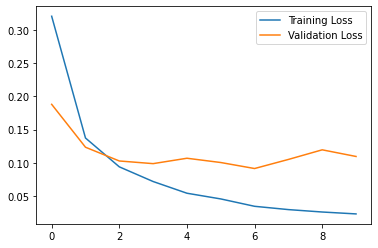

In [14]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:
## YOUR CODE HERE ##
model.eval()
test_correct = 0
total_test_predictions = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)
        total_test_predictions += labels.size(0)
        test_correct += (preds == labels).sum().item()
test_accuracy = (test_correct / total_test_predictions) * 100
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 97.28%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

My model is accurate enaugh but i will try to tweak the learning rate and the parameters to see what could change

In [18]:
## YOUR CODE HERE ##
optimizer =  optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [19]:
## YOUR CODE HERE ##

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_epochs = 10
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train_predictions = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # Zero gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Compute loss
        loss = criterion(outputs, labels)
        # Backpropagation and optimizer step
        loss.backward()
        optimizer.step()
        # Predictions and accuracy
        _, preds = torch.max(outputs.data, 1)
        total_train_predictions += labels.size(0)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    
    train_acc = (train_correct / total_train_predictions) * 100
    train_loss_avg = train_loss / len(train_loader)
    train_loss_history.append(train_loss_avg)
    train_acc_history.append(train_acc)
    
    print(f'Epoch {epoch + 1}: Training Accuracy: {train_acc:.2f}% | Training Loss: {train_loss_avg:.5f}')
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    total_val_predictions = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            total_val_predictions += labels.size(0)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()

    val_acc = (val_correct / total_val_predictions) * 100
    val_loss_avg = val_loss / len(val_loader)
    val_loss_history.append(val_loss_avg)
    val_acc_history.append(val_acc)
    
    print(f'Epoch {epoch + 1}: Validation Accuracy: {val_acc:.2f}% | Validation Loss: {val_loss_avg:.5f}')


Epoch 1: Training Accuracy: 99.97% | Training Loss: 0.00235
Epoch 1: Validation Accuracy: 98.05% | Validation Loss: 0.08435
Epoch 2: Training Accuracy: 99.97% | Training Loss: 0.00222
Epoch 2: Validation Accuracy: 98.06% | Validation Loss: 0.08428
Epoch 3: Training Accuracy: 99.97% | Training Loss: 0.00213
Epoch 3: Validation Accuracy: 98.08% | Validation Loss: 0.08508
Epoch 4: Training Accuracy: 99.98% | Training Loss: 0.00204
Epoch 4: Validation Accuracy: 98.08% | Validation Loss: 0.08512
Epoch 5: Training Accuracy: 99.98% | Training Loss: 0.00200
Epoch 5: Validation Accuracy: 98.07% | Validation Loss: 0.08538
Epoch 6: Training Accuracy: 99.98% | Training Loss: 0.00191
Epoch 6: Validation Accuracy: 98.03% | Validation Loss: 0.08567
Epoch 7: Training Accuracy: 99.98% | Training Loss: 0.00185
Epoch 7: Validation Accuracy: 98.05% | Validation Loss: 0.08605
Epoch 8: Training Accuracy: 99.98% | Training Loss: 0.00179
Epoch 8: Validation Accuracy: 98.04% | Validation Loss: 0.08616
Epoch 9:

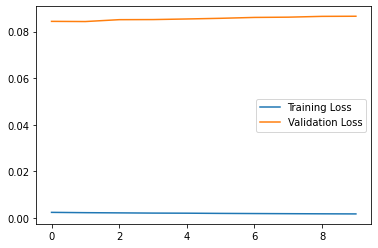

In [20]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [21]:
## YOUR CODE HERE ##
model.eval()
test_correct = 0
total_test_predictions = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)
        total_test_predictions += labels.size(0)
        test_correct += (preds == labels).sum().item()
test_accuracy = (test_correct / total_test_predictions) * 100
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 98.10%


## Saving your model
Using `torch.save`, save your model for future loading.

In [26]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), 'mnist_model.pth')